In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install interpret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 45.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 778.9/778.9 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 10.0 MB/s eta 0:00:00
  Created wheel for dash-cytoscape: filename=dash_cytoscape-1.0.2-py3-none-any.whl size=40

In [3]:
# import statements
import pandas as pd
import numpy as np
from interpret.glassbox import ExplainableBoostingClassifier
from interpret import show
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


 Fold: 0
              precision    recall  f1-score   support

          N1       0.20      0.22      0.21        45
          N2       0.40      0.42      0.41       163
          N3       0.44      0.44      0.44       269
          N4       0.48      0.43      0.46       286
          N5       0.49      0.56      0.52       147

    accuracy                           0.44       910
   macro avg       0.40      0.41      0.41       910
weighted avg       0.44      0.44      0.44       910


 Fold: 1
              precision    recall  f1-score   support

          N1       0.12      0.13      0.12        45
          N2       0.31      0.37      0.34       163
          N3       0.34      0.32      0.33       269
          N4       0.44      0.41      0.42       286
          N5       0.41      0.41      0.41       147

    accuracy                           0.36       910
   macro avg       0.32      0.33      0.33       910
weighted avg       0.37      0.36      0.36       910


 

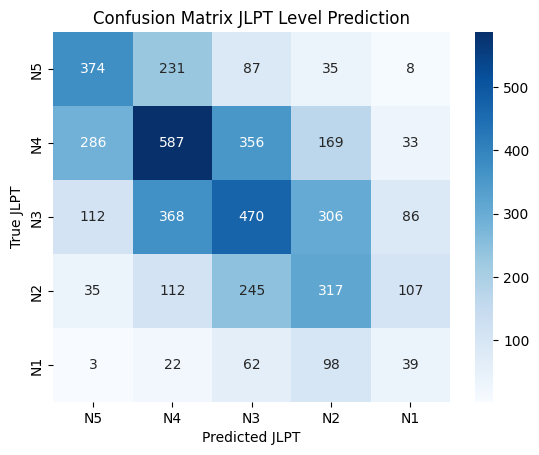


 Overall Classification Report (All Folds Combined):
              precision    recall  f1-score   support

          N5       0.46      0.51      0.48       735
          N4       0.44      0.41      0.43      1431
          N3       0.39      0.35      0.37      1342
          N2       0.34      0.39      0.36       816
          N1       0.14      0.17      0.16       224

    accuracy                           0.39      4548
   macro avg       0.36      0.37      0.36      4548
weighted avg       0.40      0.39      0.39      4548


 Per JLPT Level Metrics
N5: Accuracy = 0.508843537414966 Precision = 1.0 Recall = 0.508843537414966 F1=f1
N4: Accuracy = 0.41020265548567436 Precision = 1.0 Recall = 0.41020265548567436 F1=f1
N3: Accuracy = 0.3502235469448584 Precision = 1.0 Recall = 0.3502235469448584 F1=f1
N2: Accuracy = 0.38848039215686275 Precision = 1.0 Recall = 0.38848039215686275 F1=f1
N1: Accuracy = 0.17410714285714285 Precision = 1.0 Recall = 0.17410714285714285 F1=f1


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

In [8]:
#load data
file_path = '/content/drive/MyDrive/Thesis/training_data.csv'

df = pd.read_csv(file_path, index_col=0)

#remove participant and text columns
df = df.drop(columns=['participant', 'text_name','JCATscore', 'loc', 'lang', 'age', 'gender']) # remove identifiers.

#remove native speaker rows
df=df[df['JLPT'] != 'NS']

#replace empty fields with 0
df=df.fillna(0)

#ensure categorical variables are recognized as such
categorical_columns = ['JLPT']

for col in categorical_columns:
    df[col] = df[col].astype('category')


X = df.drop(columns=['JLPT']) # feature columns (everything but JLPT column)
y = df['JLPT'].astype(str)

features_names = X.columns.tolist()

# set the splits
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up cross validation
all_true=[]
all_predictions = []
all_indices = []
pre_counts_total = Counter()
post_counts_total= Counter()

for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
  print(f"\n Fold: {fold}")

  # split data
  x_train, x_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]
  pre_counts_total.update(y_train.value_counts().to_dict()) # update counts pre-sampling

  #Oversample within the training set
  ros = RandomOverSampler(random_state=42)
  x_train_resampled, y_train_resampled = ros.fit_resample(x_train, y_train)

  #convert resampled target to regular series
  y_train_resampled = pd.Series(y_train_resampled).astype(str)
  post_counts_total.update(y_train_resampled.value_counts().to_dict()) # update counts post-sampling

  #Train EBM
  ebm_fold = ExplainableBoostingClassifier(
      interactions=0, # no interactions
      random_state=42,
      n_jobs=1,
      )

  ebm_fold.fit(x_train_resampled, y_train_resampled)

  #Predict and evaluate
  y_pred = ebm_fold.predict(x_test)

  all_true.append(y_test)
  all_predictions.append(y_pred)
  all_indices.append(x_test.index)



  print(classification_report(y_test,y_pred))


print('finished training')
print('\n')
print('Total JLPT distribution BEFORE oversampling (across all folds)')
print('\n')
print(dict(pre_counts_total))
print('\n')
print('Total JLPT distribution AFTER oversampling (across all folds)')
print('n')
print(dict(post_counts_total))
######################################################
#  Model performace evaluation
######################################################
# Aggregate OOF results
y_true_all = pd.concat(all_true)
y_pred_all = np.concatenate(all_predictions)
indices_all = np.concatenate(all_indices)

# sort by the original order
order = np.argsort(indices_all)
y_true_all = y_true_all.iloc[order]
y_pred_all = y_pred_all[order]


JLPT_levels= ['N5','N4','N3','N2','N1']

cm= confusion_matrix(y_true_all, y_pred_all, labels=JLPT_levels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=JLPT_levels,
            yticklabels=JLPT_levels)
plt.xlabel('Predicted JLPT')
plt.ylabel('True JLPT')
plt.title('Confusion Matrix JLPT Level Prediction')
plt.show()


print('\n Overall Classification Report (All Folds Combined):')
print(classification_report(y_true_all, y_pred_all, labels=JLPT_levels))

####################################
# Per JLPT lvl Metrics
###################################

print("\n Per JLPT Level Metrics")
for level in JLPT_levels:
  mask = y_true_all == level
  y_true_subset = y_true_all[mask]
  y_pred_subset = y_pred_all[mask]
  accuracy = accuracy_score(y_true_subset, y_pred_subset)
  precision = precision_score(y_true_subset, y_pred_subset, average='weighted')
  recall = recall_score(y_true_subset, y_pred_subset, average='weighted')
  f1 = f1_score(y_true_subset, y_pred_subset, average='weighted')
  print(f"{level}: Accuracy = {accuracy} Precision = {precision} Recall = {recall} F1=f1")



######################################
# Final Model
######################################
ebm_final = ExplainableBoostingClassifier(
    interactions=0, # no interactions
    random_state=42,
    n_jobs=1,
    max_bins=256,
    max_leaves = 3,
    )

ebm_final.fit(X, y)

ebm_global = ebm_final.explain_global()
show(ebm_global)


# Feature Importance Ranking


In [9]:
features_importance = ebm_global.data()

features_names = features_importance['names']
feature_importances = features_importance['scores']

sorted_features = sorted(zip(features_names, feature_importances), key=lambda x: x[1], reverse=True)

i=1
print(f'Top features rank')
for feature, importance in sorted_features:
    print(f"{i}. {feature}: {importance}")
    i+=1

Top features rank
1. Coordinate Clauses per sentence: 0.06319425574144552
2. Coordinate Clauses per clause: 0.05830217807245611
3. JLPT Vocab percent N2: 0.05471817016904914
4. MHD: 0.05396135139120442
5. SCfreq: 0.049155282937905664
6. mci_5_surface: 0.044248016414937565
7. mci_10_surface: 0.043724866017562855
8. JLPT Vocab percent N4: 0.03720183898303819
9. Avg Clause per Sent: 0.036563372305653305
10. LFP_OOV_percent: 0.03576892451595661
11. Avg Sent Length: 0.03150024426332492
12. CF_ukemi_N4_ratio: 0.031040424071531028
13. mci_10_inflection: 0.030583392734263356
14. JRMA_all_MATTR: 0.030315194949040766
15. JRMA_function_MATTR: 0.03029683172245733
16. MDD: 0.028525340600706835
17. adverb_density: 0.028088917437378968
18. adjective_density: 0.027803958533299335
19. JRMA_aux_chains: 0.02701872734587644
20. Subordinate Clauses per clause: 0.02622726570177418
21. JLPT Vocab N2: 0.026195347995648457
22. LFP_3k_percent: 0.025533909411994203
23. verb_density: 0.024132688274859506
24. LFP_